# Data Pre-processing

First, open the coffee datasets, upload them and merge them into one

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [9]:
import pandas as pd

def readXlsx(excel_file):
    return pd.read_excel(excel_file)

def upload(df):
    df = df.iloc[2:,:]
    df.columns = ['Date', 'Symbol', 'Warehouse', 'ProductionYear', 'Open', 'Close', 'High', 'Low', 'Change', 'PercentageChange', 'Volume']
    return df

df_cof = upload(readXlsx('Datasets/Coffee/Coffee-2012.xlsx'))
df_cof_2013 = upload(readXlsx('Datasets/Coffee/Coffee-2013.xlsx'))
df_cof_2014 = upload(readXlsx('Datasets/Coffee/Coffee-2014.xlsx'))
df_cof_2015 = upload(readXlsx('Datasets/Coffee/Coffee-2015.xlsx'))
df_cof_2016 = upload(readXlsx('Datasets/Coffee/Coffee-2016.xlsx'))
df_cof_2017 = upload(readXlsx('Datasets/Coffee/Coffee-2017.xlsx'))
df_cof_2018 = upload(readXlsx('Datasets/Coffee/Coffee-2018.xlsx'))
df_cof_2019 = upload(readXlsx('Datasets/Coffee/Coffee-2019.xlsx'))

df_cof = df_cof.append([df_cof_2013, df_cof_2014, df_cof_2015, df_cof_2016, df_cof_2017, df_cof_2018, df_cof_2019])
df_cof.index = [i for i in range(1, df_cof.shape[0]+1)]
df_cof.head()

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [13]:
print(type(df_cof_2013))

<class 'pandas.core.frame.DataFrame'>


In [3]:
import numpy as np
sr = df_cof.Symbol.value_counts(sort=True)
sr

LUBP4      1482
LUBP3      1455
WSDA3      1321
ULK5       1306
WSDB3      1279
           ... 
WLMA6np       1
USUHRC8       1
USWSDB8       1
USUSDE3       1
WTP7          1
Name: Symbol, Length: 719, dtype: int64

The most frequently traded coffee types are LUBP, WSDA and ULK types. We'll restrict our study to these types

In [4]:
df_cof_lubp = df_cof.loc[df_cof['Symbol'].str.contains('LUBP'), :]
df_cof_wsda = df_cof.loc[df_cof['Symbol'].str.contains('WSDA'), :]
df_cof_ulk = df_cof.loc[df_cof['Symbol'].str.contains('WYCA'), :]

In [29]:
df_lubp_temp = df_cof_lubp.copy()
df_wsda_temp = df_cof_wsda.copy()
df_ulk_temp = df_cof_ulk.copy()

print(df_lubp_temp['Date'])
df_lubp_temp['Date'] = pd.to_datetime(df_cof_lubp['Date'], format='%Y-%m-%d')
df_lubp_temp.drop(['Close'], axis=1, inplace=True)

df_wsda_temp['Date'] = pd.to_datetime(df_cof_wsda['Date'], format='%Y-%m-%d')
df_wsda_temp.drop(['Close'], axis=1, inplace=True)

df_ulk_temp['Date'] = pd.to_datetime(df_ulk_temp['Date'], format='%Y-%m-%d')
df_ulk_temp.drop(['Close'], axis=1, inplace=True)

def toNumeric(col):
    str_col = [str(x) for x in col]
    float_col = []
    for x in str_col:
        if x.find(',') != -1:
            var = x[0:x.find(',')] + x[x.find(',')+1:]
            float_col.append(float(var))
        else:
            float_col.append(x)
    return pd.to_numeric(float_col)

df_lubp_temp['Open'] = toNumeric(df_lubp_temp.Open)
df_lubp_temp['Volume'] = toNumeric(df_lubp_temp.Volume)
df_wsda_temp['Open'] = toNumeric(df_wsda_temp.Open)
df_wsda_temp['Volume'] = toNumeric(df_wsda_temp.Volume)
df_ulk_temp['Open'] = toNumeric(df_ulk_temp.Open)
df_ulk_temp['Volume'] = toNumeric(df_ulk_temp.Volume)

df_lubp_temp = df_lubp_temp.sort_values(by='Date')
df_wsda_temp = df_wsda_temp.sort_values(by='Date')
df_ulk_temp = df_ulk_temp.sort_values(by='Date')
df_lubp_temp = df_lubp_temp.set_index('Date')
df_wsda_temp = df_wsda_temp.set_index('Date')
df_ulk_temp = df_ulk_temp.set_index('Date')

df_cof_lubp = pd.DataFrame(df_lubp_temp['Open'].resample('W').mean())
df_cof_lubp['Symbol'] = df_lubp_temp['Symbol'].resample('W').first()
df_cof_lubp['Volume'] = df_lubp_temp['Volume'].resample('W').mean()

df_cof_wsda = pd.DataFrame(df_wsda_temp['Open'].resample('W').mean())
df_cof_wsda['Symbol'] = df_wsda_temp['Symbol'].resample('W').first()
df_cof_wsda['Volume'] = df_wsda_temp['Volume'].resample('W').mean()

df_cof_ulk = pd.DataFrame(df_ulk_temp['Open'].resample('W').mean())
df_cof_ulk['Symbol'] = df_ulk_temp['Symbol'].resample('W').first()
df_cof_ulk['Volume'] = df_ulk_temp['Volume'].resample('W').mean()

9627     2012-02-22 00:00:00
9628     2012-02-14 00:00:00
9629     2012-01-31 00:00:00
9630     2012-02-06 00:00:00
9631     2012-03-12 00:00:00
                ...         
91381    2019-08-28 00:00:00
91382    2019-08-27 00:00:00
91383    2019-08-26 00:00:00
91384    2019-08-23 00:00:00
91385    2019-04-17 00:00:00
Name: Date, Length: 7444, dtype: object


# Exploratory Data Analysis

Below is a chart depicting the correlation between the LUBP coffee standards

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

def plotDataFrame(data_frames, color, filename=None):
    fig = plt.figure(figsize=(20,10))
    for df, c in zip(data_frames, color):
        row = df.iloc[1:2, :]
        val = str(row['Symbol'].values)
        label = val[2:-2]
        plt.plot(df.index, df['Open'], c=c, label=label)
    plt.legend()
    if filename:
        plt.savefig(f'out/{filename}.png')
    plt.show()

def separateTypes(df_cof_type):
    sr = df_cof_type.Symbol.value_counts(sort=True)
    print(len(sr))
    data_frames_type = []
    for item in sr.iteritems():
        df_item = df_cof_type.loc[df_cof_type['Symbol'] == item[0], :]
        df_item.Open = pd.to_numeric(df_item.Open)
        data_frames_type.append(df_item)
    return data_frames_type

19


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


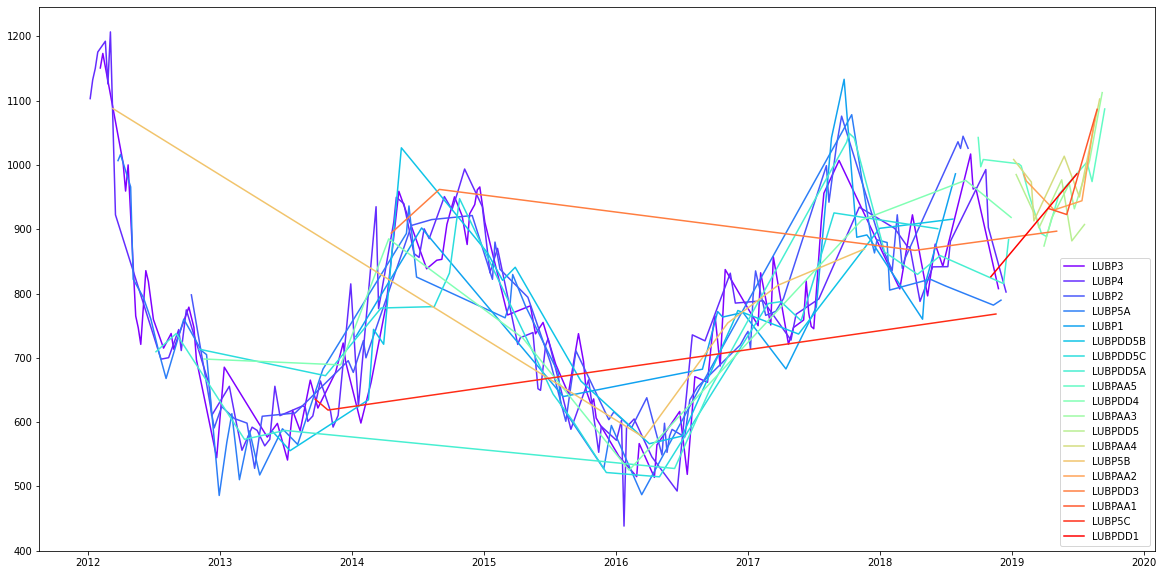

In [31]:
data_frames_lubp = separateTypes(df_cof_lubp)
count = 0
color = cm.rainbow(np.linspace(0, 1, len(data_frames_lubp)))

plotDataFrame(data_frames_lubp, color)

Below is a chart depicting the correlation between the WSDA coffee standards

15


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


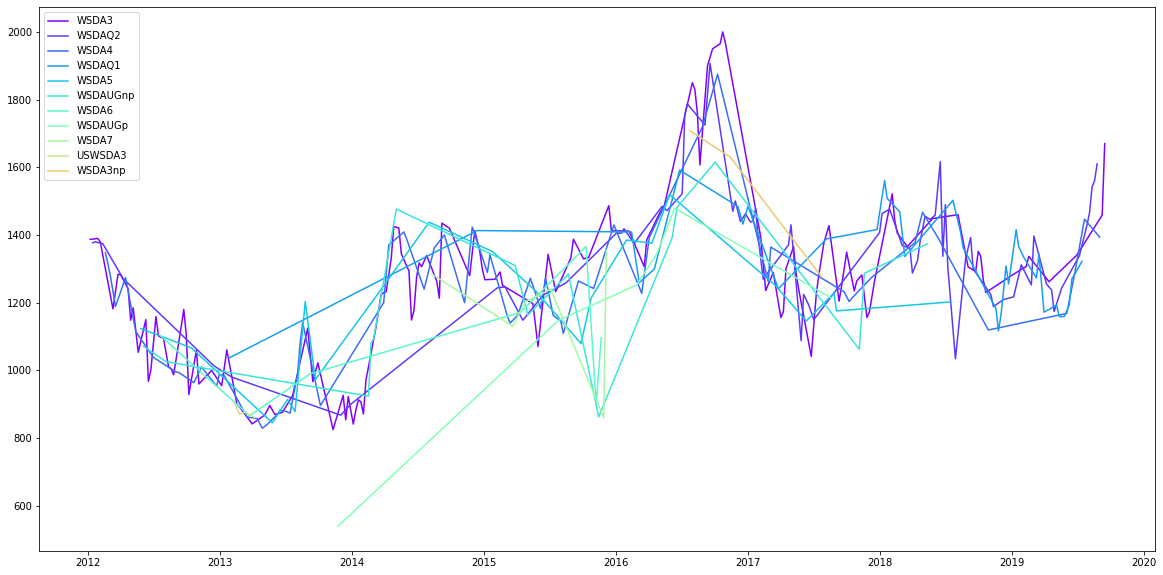

In [32]:
data_frames_wsda = separateTypes(df_cof_wsda)
count = 0
color = cm.rainbow(np.linspace(0, 1, len(data_frames_wsda)))

plotDataFrame(data_frames_wsda, color)

Below is a chart depicting the correlation between the ULK coffee standards

8


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


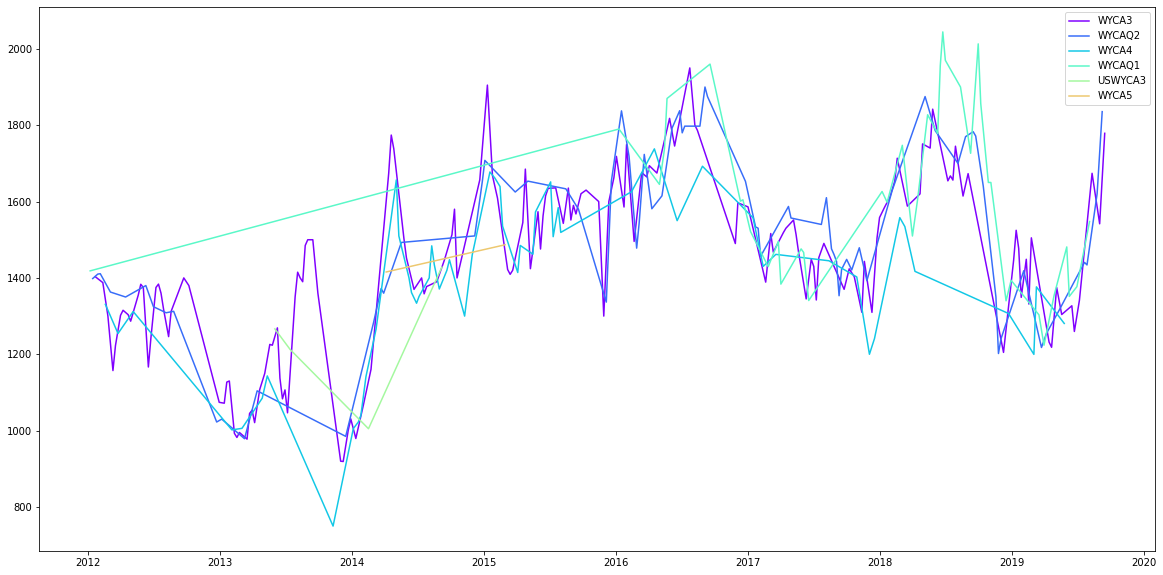

In [33]:
data_frames_ulk = separateTypes(df_cof_ulk)

count = 0
color = cm.rainbow(np.linspace(0, 1, len(data_frames_ulk)))

plotDataFrame(data_frames_ulk, color)

Below is a chart depicting the correlation between the Total Volume of the three coffee standards

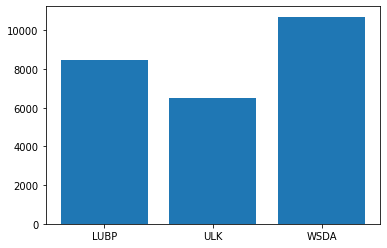

In [34]:
volume_lubp = df_cof_lubp.Volume.sum()
volume_ulk = df_cof_ulk.Volume.sum()
volume_wsda = df_cof_wsda.Volume.sum()

volume_frames = [volume_lubp, volume_ulk, volume_wsda]
volume_ticks = ('LUBP', 'ULK', 'WSDA')

x = [0, 1, 2]
fig, ax = plt.subplots() 
plt.bar(x, volume_frames)
plt.xticks(x, volume_ticks)
plt.show()
 

## Lag Plot

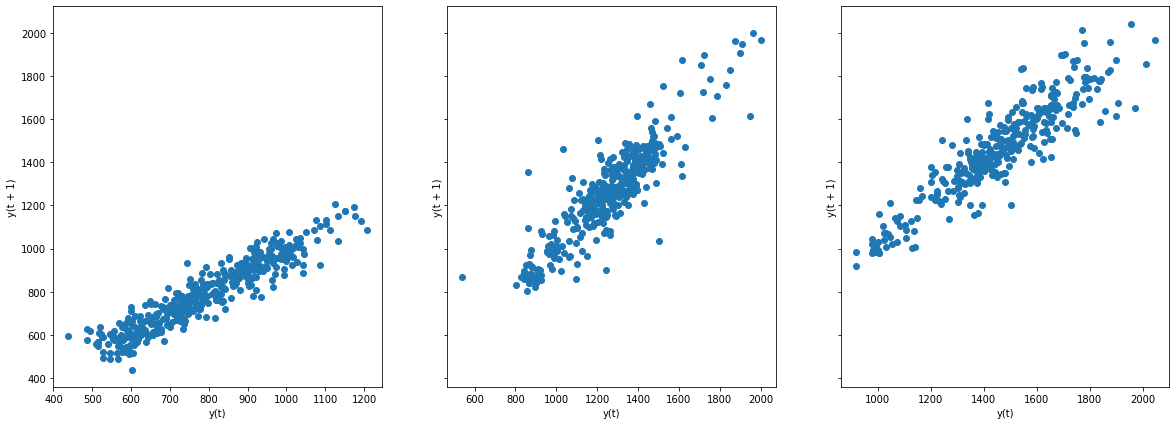

In [35]:
from pandas.plotting import lag_plot

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey='row', figsize=(20, 7))

lag_plot(df_cof_lubp['Open'], ax=ax1)
lag_plot(df_cof_wsda['Open'], ax=ax2)
lag_plot(df_cof_ulk['Open'], ax=ax3)

## Seasonal Decompositions

Taken individually, the coffee standard types are sparsely traded. But since we know their prices to be almost equal and
proportionally traded, we will use the integrated dataframe to find hidden patterns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


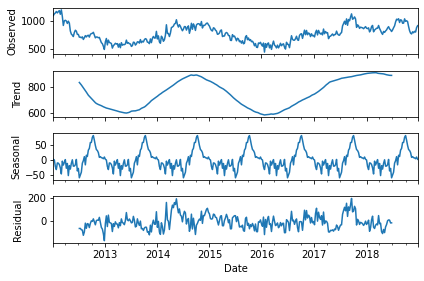

In [36]:
import statsmodels.api as sm

y_lubp = df_cof_lubp['Open']
y1 = y_lubp.loc[y_lubp.index < '2019-01-01']
decompose = sm.tsa.seasonal_decompose(y1, model='additive')
fig = decompose.plot()
plt.show()

The WSDA and ULK coffee types have missing values so deal with them before performing seasonal decomposition

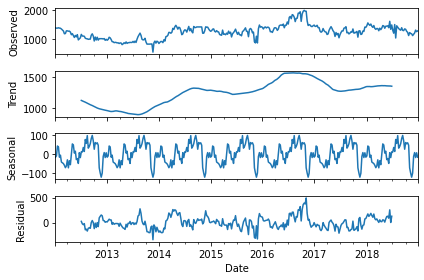

In [37]:
df_cof_wsda = df_cof_wsda.fillna(method='pad')
y_wsda = df_cof_wsda['Open']
y2 = y_wsda.loc[y_wsda.index < '2019-01-01']
decompose = sm.tsa.seasonal_decompose(y2, model='additive')
fig = decompose.plot()
plt.show()

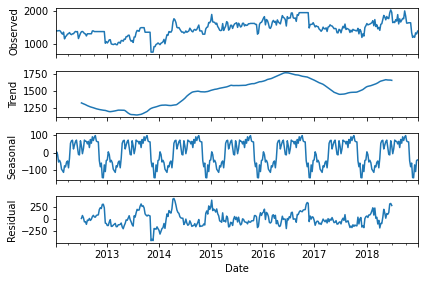

In [38]:
df_cof_ulk = df_cof_ulk.fillna(method='pad')
y_ulk = df_cof_ulk['Open']
y3 = y_ulk.loc[y_ulk.index < '2019-01-01']
decompose = sm.tsa.seasonal_decompose(y3, model='additive')
fig = decompose.plot()
plt.show()

Perform Grid Search to find the optimal non-seasonal and seasonal parameters.

In [ ]:
import itertools
import statsmodels.api as sm

p, d, q = range(0, 5), range(0, 3), range(0, 3), 
sp, sd, sq = range(0, 5), range(0, 3), range(0, 2)
pdq, s_pdq = list(itertools.product(p, d, q)), list(itertools.product(sp, sd, sq, ))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in s_pdq]
lowest_aic = 10000
optimal, optimal_seasonal = (0, 0, 0), (0, 0, 0)
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(y1,
                                       order=param,
                                       seasonal_order=param_seasonal,
                                       enforce_stationarity=False,
                                       enforce_invertibility=False)
        results = mod.fit()
        if results.aic < lowest_aic:
            lowest_aic = results.aic
            optimal = param
            optimal_seasonal = param_seasonal
            
        print('{}x{}-{}'.format(param, param_seasonal, results.aic))
print('lowest AIC = {}, params = {}, seasonal params = {}'.format(lowest_aic, optimal, optimal_seasonal))

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y1,
                               order=(3, 2, 1),
                               seasonal_order = (4, 1, 1, 52),
                               enforce_stationarity=False,
                               enforce_invertibility=False)
result_lubp = mod.fit()
print(result_lubp.aic)
result_lubp.summary().tables[1]

The output above suggests that SARIMAX(4, 2, 2)x(4, 2, 1, 52) yields the lowest AIC value of 568.74. Therefore we should take that as the optimal values

In [ ]:
results_lubp.plot_diagnostics(figsize=(20, 7))
plt.show()

In [ ]:
p = d = q = range(0, 5)
sp, sd, sq = range(0, 5), range(0, 3), range(0, 2)
pdq = itertools.product(p, d, q)
seasonal_pdq = itertools.product(sp, sd, sq, range(52, 53))
lowest_aic = 10000
optimal, optimal_seasonal = (0, 0, 0), (0, 0, 0)
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(y2,
                                       order=param,
                                       seasonal_order=param_seasonal,
                                       enforce_stationarity=False,
                                       enforce_invertibility=False)
        results_wsda = mod.fit()
        
        if results_wsda.aic < lowest_aic:
            lowest_aic = results_wsda.aic
            optimal = param
            optimal_seasonal = param_seasonal
            
print('lowest AIC = {}, params = {}, seasonal params = {}'.format(lowest_aic, optimal, optimal_seasonal))

In [ ]:
model = sm.tsa.statespace.SARIMAX(y2,
                                 order=(4, 2, 2),
                                 seasonal_order=(4, 2, 1, 52),
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
results_wsda = model.fit()
print(results_wsda.aic)
results_wsda.summary().tables[1]

In [ ]:
fig = results_wsda.plot_diagnostics(figsize=(20, 7))
plt.show()

In [ ]:
p = range(0, 5)
d = range(0, 3)
q = range(0, 3)
m = range(52, 53)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = (itertools.product(p, d, range(0, 2), m))
lowest_aic = 10000
optimal, optimal_seasonal = (0, 0, 0), (0, 0, 0)
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(y3,
                                       order=param,
                                       seasonal_order=param_seasonal,
                                       enforce_stationarity=False,
                                       enforce_invertibility=False)
        results_ulk = mod.fit()
        
        if results_ulk.aic < lowest_aic:
            lowest_aic = results_ulk.aic
            optimal = param
            optimal_seasonal = param_seasonal
        
print('lowest AIC = {}, params = {}, seasonal params = {}'.format(lowest_aic, optimal, optimal_seasonal))     

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y3,
                               order=(3, 1, 1),
                               seasonal_order=(4, 2, 1, 52),
                               enforce_stationarity=False,
                               enforce_invertibility=False)
results_ulk = mod.fit()
print(results_ulk.aic)
results_ulk.summary().tables[1]

In [ ]:
pred_ulk = results_ulk.get_prediction(start=pd.to_datetime('2019-01-06'), end=pd.to_datetime('2019-09-15'), dynamic=False)
ax = y_ulk['2019':].plot(label='WYCA observed')
pred_ulk.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=0.7, figsize=(20, 7))
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.show()

## Validating forecasts

In [ ]:
pred_lubp = result_lubp.get_prediction(start=pd.to_datetime('2019-01-06'), end=pd.to_datetime('2019-09-15'), dynamic=False)
pred_lubp_ci = pred_lubp.conf_int()

ax = y_lubp['2019':].plot(label='LUBP observed')
pred_lubp.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=0.8, figsize=(20, 7))
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.show()

In [ ]:
pred_wsda = results_wsda.get_prediction(start=pd.to_datetime('2019-01-06'), end=pd.to_datetime('2019-09-15'), dynamic=False)
pred_wsda_ci = pred_wsda.conf_int()

ax = y_wsda['2019':].plot(label='WSDA observed')
pred_wsda.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=0.7, figsize=(20, 7))
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.show()

In [ ]:
pred_ulk = results_ulk.get_prediction(start=pd.to_datetime('2019-01-06'), end=pd.to_datetime('2019-09-15'), dynamic=False)
pred_ci_ulk = pred_ulk.conf_int()
ax = y_ulk['2019':].plot(label='WYCA observed')
pred_ulk.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=0.7, figsize=(20, 7))
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.show()

Calculate the Mean Absolute Percentage Errors (MAPE)

In [ ]:
predictions = list(pred_lubp.predicted_mean)
response = list(y_lubp['2019':])

mape = 0
for pred, resp in zip(predictions, response):
    mape += abs(pred - resp) / resp * 100
mape /= len(predictions)
mape

In [ ]:
predictions_wsda = list(pred_wsda.predicted_mean)
response_wsda = list(y_wsda['2019':])

mape_wsda = 0
for pred, resp in zip(predictions_wsda, response_wsda):
    mape_wsda += abs(pred - resp) / resp * 100
mape_wsda /= len(predictions_wsda)
mape_wsda

In [ ]:
predictions_wyca = list(pred_ulk.predicted_mean)
response_wyca = list(y_ulk['2019':])

mape_wyca = 0
for pred, resp in zip(predictions_wyca, response_wyca):
    mape_wyca += abs(pred - resp) / resp * 100
mape_wyca /= len(predictions_wyca)
mape_wyca